<a href="https://colab.research.google.com/github/BluceHuang/tf2/blob/main/Coding_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [5]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])




In [6]:
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [40]:
# Build the Sequential convolutional neural network model
model = Sequential([
    Conv2D(16, kernel_size=3, activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=3),
    Flatten(),
    Dense(10, activation='softmax'),
])


In [41]:
# Print the model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                10250     
                                                                 
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [54]:
# Define the model optimizer, loss function and metrics
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
loss = tf.keras.losses.SparseCategoricalCrossentropy()
mae = tf.keras.metrics.MeanAbsoluteError()
model.compile(optimizer=opt,loss=loss,metrics=[acc,mae])


In [55]:
# Print the resulting model attributes

print(model.loss)
print(model.optimizer)
print(model.metrics)

[]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [34]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [21]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [47]:
# Print the shape of the training data
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [45]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]
print(train_labels)

[9 0 0 ... 3 0 5]


In [57]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images/255.
test_images = test_images/255.

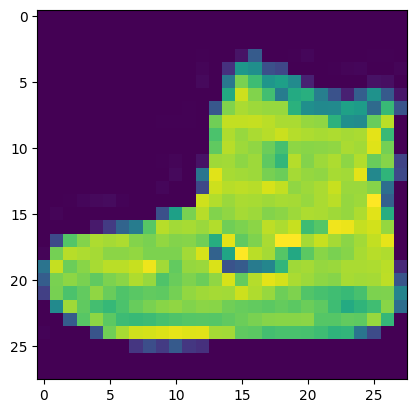

label: Ankle boot


In [58]:
# Display one of the images
i = 0 
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")


#### Fit the model

In [68]:
1# Fit the model

history = model.fit(train_images[...,np.newaxis], train_labels, epochs=8, batch_size=256,verbose=2)

Epoch 1/8
235/235 - 11s - loss: 2.2993 - sparse_categorical_accuracy: 0.1112 - mean_absolute_error: 4.4200 - 11s/epoch - 45ms/step
Epoch 2/8
235/235 - 10s - loss: 2.2993 - sparse_categorical_accuracy: 0.1129 - mean_absolute_error: 4.4200 - 10s/epoch - 42ms/step
Epoch 3/8
235/235 - 11s - loss: 2.3029 - sparse_categorical_accuracy: 0.0991 - mean_absolute_error: 4.4200 - 11s/epoch - 45ms/step
Epoch 4/8
235/235 - 11s - loss: 2.3028 - sparse_categorical_accuracy: 0.1002 - mean_absolute_error: 4.4200 - 11s/epoch - 46ms/step
Epoch 5/8
235/235 - 11s - loss: 2.3029 - sparse_categorical_accuracy: 0.0994 - mean_absolute_error: 4.4200 - 11s/epoch - 46ms/step
Epoch 6/8
235/235 - 10s - loss: 2.3029 - sparse_categorical_accuracy: 0.0977 - mean_absolute_error: 4.4200 - 10s/epoch - 45ms/step
Epoch 7/8
235/235 - 10s - loss: 2.3028 - sparse_categorical_accuracy: 0.1003 - mean_absolute_error: 4.4200 - 10s/epoch - 45ms/step
Epoch 8/8
235/235 - 10s - loss: 2.3028 - sparse_categorical_accuracy: 0.0977 - mean

#### Plot training history

In [69]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df.head()


,loss,sparse_categorical_accuracy,mean_absolute_error
0,2.299284,0.111217,4.420001
1,2.299308,0.112867,4.420001
2,2.302934,0.099133,4.420000
3,2.302833,0.100233,4.420001
4,2.302867,0.099417,4.420000


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

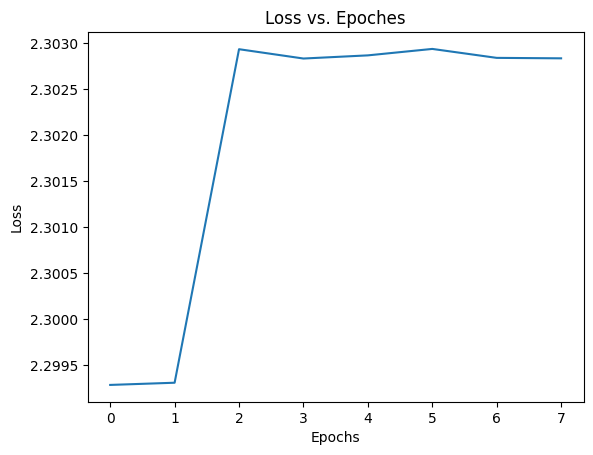

In [71]:
# Make a plot for the loss
loss_plot = df.plot(y="loss",title="Loss vs. Epoches", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")


In [ ]:
# Make a plot for the accuracy



In [ ]:
# Make a plot for the additional metric



***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [75]:
# Evaluate the model
loss,accuracy,mae=model.evaluate(test_images[...,np.newaxis],test_labels)


313/313 [==============================] - 1s 4ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.1000 - mean_absolute_error: 4.4200


#### Make predictions from the model

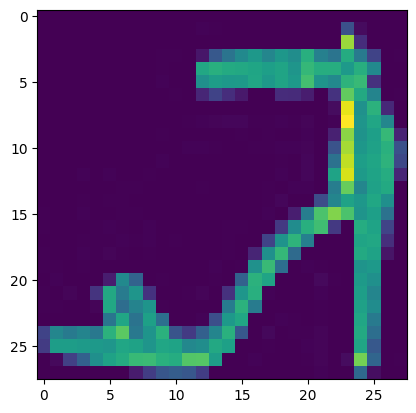

Label: Sandal


In [78]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [80]:
# Get the model predictions
pred = model.predict(test_image[np.newaxis,...,np.newaxis])
print(pred)

1/1 [==============================] - 0s 50ms/step
[[0.09953199 0.10079069 0.10283003 0.09951295 0.10224709 0.09966418
  0.09765688 0.09841649 0.09846736 0.10088232]]
